In [980]:
import pandas as pd
import seaborn as sns
import numpy as np

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
all_data = pd.concat([train_df,test_df],axis=0)
all_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [981]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [982]:
all_data['FamilySize'] = all_data['Parch']+all_data['SibSp']+1
all_data['Name'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
all_data.drop([ 'PassengerId','Ticket','Cabin'],axis=1,inplace=True)
age_mean = all_data['Age'].mean()
age_var = all_data['Age'].std()
ranodm_val = np.random.normal(loc=age_mean,scale=age_var,size=all_data['Age'].isnull().sum())
age_series = all_data['Age']
age_series[age_series.isnull()] = ranodm_val
all_data['Age'] = age_series
mode_embarked = all_data['Embarked'].mode()[0]
all_data['Embarked'].fillna(mode_embarked,inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Name        1309 non-null   object 
 3   Sex         1309 non-null   object 
 4   Age         1309 non-null   float64
 5   SibSp       1309 non-null   int64  
 6   Parch       1309 non-null   int64  
 7   Fare        1308 non-null   float64
 8   Embarked    1309 non-null   object 
 9   FamilySize  1309 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 112.5+ KB


/var/folders/30/jds7lw5j3ws3x5fr0d9fzlbr0000gn/T/ipykernel_26219/1055609381.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_series[age_series.isnull()] = ranodm_val


<Axes: xlabel='Embarked'>

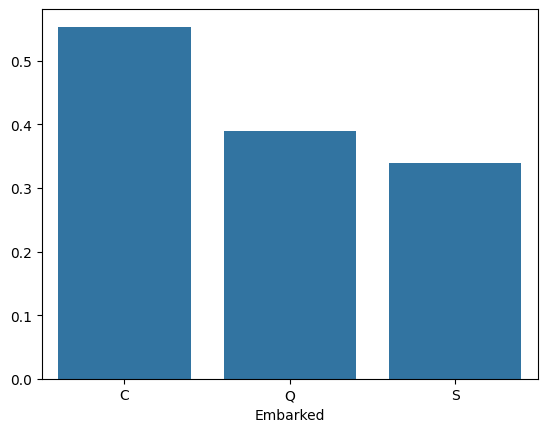

In [983]:
Y = train_df['Survived']
ntrain = train_df.shape[0]
cnts = all_data[:ntrain].groupby('Embarked')['Survived'].apply(lambda x: (x == 1).sum() /len(x))
sns.barplot(x = cnts.index, y = cnts.values)


/var/folders/30/jds7lw5j3ws3x5fr0d9fzlbr0000gn/T/ipykernel_26219/568864546.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cnts = jplot.groupby('AgeGroup')['Survived'].apply(lambda x: (x == 1).sum() /len(x))


<Axes: xlabel='AgeGroup'>

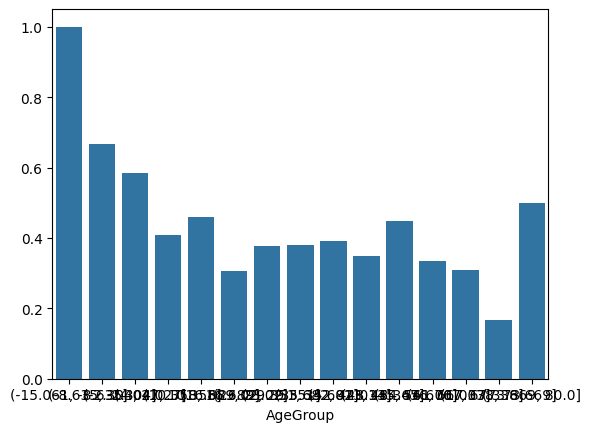

In [984]:
num_bins = 15
jplot = pd.DataFrame()
jplot['Survived'] = all_data[:ntrain]['Survived']
jplot['AgeGroup'] = all_data[:ntrain]['Age']
jplot['AgeGroup'] = pd.cut(jplot['AgeGroup'], bins=num_bins)

cnts = jplot.groupby('AgeGroup')['Survived'].apply(lambda x: (x == 1).sum() /len(x))
sns.barplot(x = cnts.index, y = cnts.values)


# counts = jplot.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)
# counts = counts.reset_index().melt(id_vars='AgeGroup', var_name='Survived', value_name='Count')
# sns.barplot(data=counts, x='AgeGroup', y='Count', hue='Survived', palette='husl')


In [985]:
all_data['Young'] = (all_data['Age']<10).astype(int)
all_data['Alone'] = (all_data['FamilySize']==1).astype(int)
# all_data.drop(all_data[all_data[:ntrain]['Age']>68].index,inplace=True)
categories = ['Sex','Embarked','Pclass','Name','Parch','SibSp']

dummy_df = pd.get_dummies(all_data[categories])

# Concatenate the dummy variables with the original DataFrame
all_data = pd.concat([all_data, dummy_df], axis=1)

# Drop the original categorical column
all_data.drop(categories+['Survived'], axis=1, inplace=True)

In [986]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# tree_classifier = DecisionTreeClassifier()

# # Define the hyperparameters and values to explore
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [5],
#     'min_samples_split': [2, 5, 10,100],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform Grid Search to find the best combination of hyperparameters
# grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(all_data[:ntrain], Y)

# # Print the best hyperparameters and best score
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [987]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(all_data[:ntrain], Y, test_size=0.1, random_state=42)
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.3,
    n_estimators=200,
    max_depth=50,
    gamma=0,
    random_state=42
)

model.fit(X_train, y_train)

predictions = model.predict(all_data[ntrain:])

result = pd.DataFrame()
result['PassengerId'] = test_df['PassengerId']
result['Survived'] = predictions
result.to_csv('./data/result.csv',index=False)

# accuracy = accuracy_score(y_test, predictions)
# print(f"Accuracy: {accuracy}")